# CumulativeAnalysis

### Introduction
In the previous CGI, we constructed annual emissions schedules, $\epsilon(t)$, in units like GtC/year. But there are two good reasons to think about a related quantity, the total amount of carbon that will be released by humans to the atmosphere. One is a reason you already know: too much emission will result in an unlivable planet. Another reason is that there is a finite amount of fossil fuel carbon in the ground. It wasn't always know which of these would ultimately limit anthropogenic emissions (as it turns out, it's the latter). Therefore, one important form of analysis is to evaluate the _total anthropogenic emission_ a given emission scenario represents. 

One way to formulate the problem is to use integral calculus,

$$
E(t) = \int_{-\infty}^t \epsilon(t) \ dt \ \ \ \ \ (1)
$$

If you have an algebraic form for $\epsilon$ (and you're skilled at calculus), you might think about doing this integration analytically, to get an algebraic form for $E(t)$. 

We're not going to do that here, though, because there's an easy way to do it in Python. The key is a numpy function called "np.cumsum," which adds up the emissions year after year. But you can see that there's a problem with that: the units would be the same units as $\epsilon(t)$, namely GtC/year. To convert the result of np.cumsum into a total accumulated emission in GtC, you'd need to multiply it by the time interval between steps in the array you're using to represent the emissions. Details are given in the code below.

### Goals

- I can use pandas and dictionaries to read data with metadata.
- I can use np.cumsum to numerically integrate a function.
- I am familiar quantitative features of cumulative anthropogenic carbon emissions.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5io

In [5]:
%matplotlib notebook

## Cumulative flow

### Load your scenario
To get the file you generated in *ScheduledFlows* into your current work space, _download_ it to your laptop or desktop, then _upload_ it to the current folder. 

Once you've done that, in the cell below, use h5io.read_hdf5 to load the scenario into Python as a dictionary named epsdictionary_fromfile (just as you did in *ScheduledFlows*). 

In [6]:
# Load in your scenario as a dictionary, using h5io.read
### BEGIN SOLUTION
# Assign a name to your file
filename = '../Week_05a.ScheduledFlows/Peaks_in_2030.hdf5'

# This loads the stored dictionary
epsdictionary_fromfile = h5io.read_hdf5(filename)
### END SOLUTION

### From dictionary -> dataframe -> Numpy data arrays
The cell below extracts time and emissions arrays in the scenario.

In [7]:
# Here we're using "display" to double-check the metadata in your dictionary
display(epsdictionary_fromfile)

# This extracts the dataframe from the dictionary
epsdf = epsdictionary_fromfile['dataframe']

# This extracts the time and emissions from the dataframe
t = np.array(epsdf['time'])
eps = np.array(epsdf['emissions'])

{'dataframe':             time     emissions
 0     1750.00000  1.582627e-02
 1     1750.10002  1.586589e-02
 2     1750.20004  1.590561e-02
 3     1750.30006  1.594543e-02
 4     1750.40008  1.598536e-02
 ...          ...           ...
 4995  2249.59992  9.335894e-11
 4996  2249.69994  9.172082e-11
 4997  2249.79996  9.101219e-11
 4998  2249.89998  8.935881e-11
 4999  2250.00000  8.863956e-11
 
 [5000 rows x 2 columns],
 'delta_t_trans': 20,
 'emission units': 'GtC/year',
 'eps_0': 12.4,
 'k': 0.025,
 't_0': 2018,
 't_trans': 2040}

### Plotting to see what we stored
In the cell below, plot the emissions we just extracted as a function of time (this will remind us what the scenario looks like, and also verify that the data haven't been corrupted).

<IPython.core.display.Javascript object>


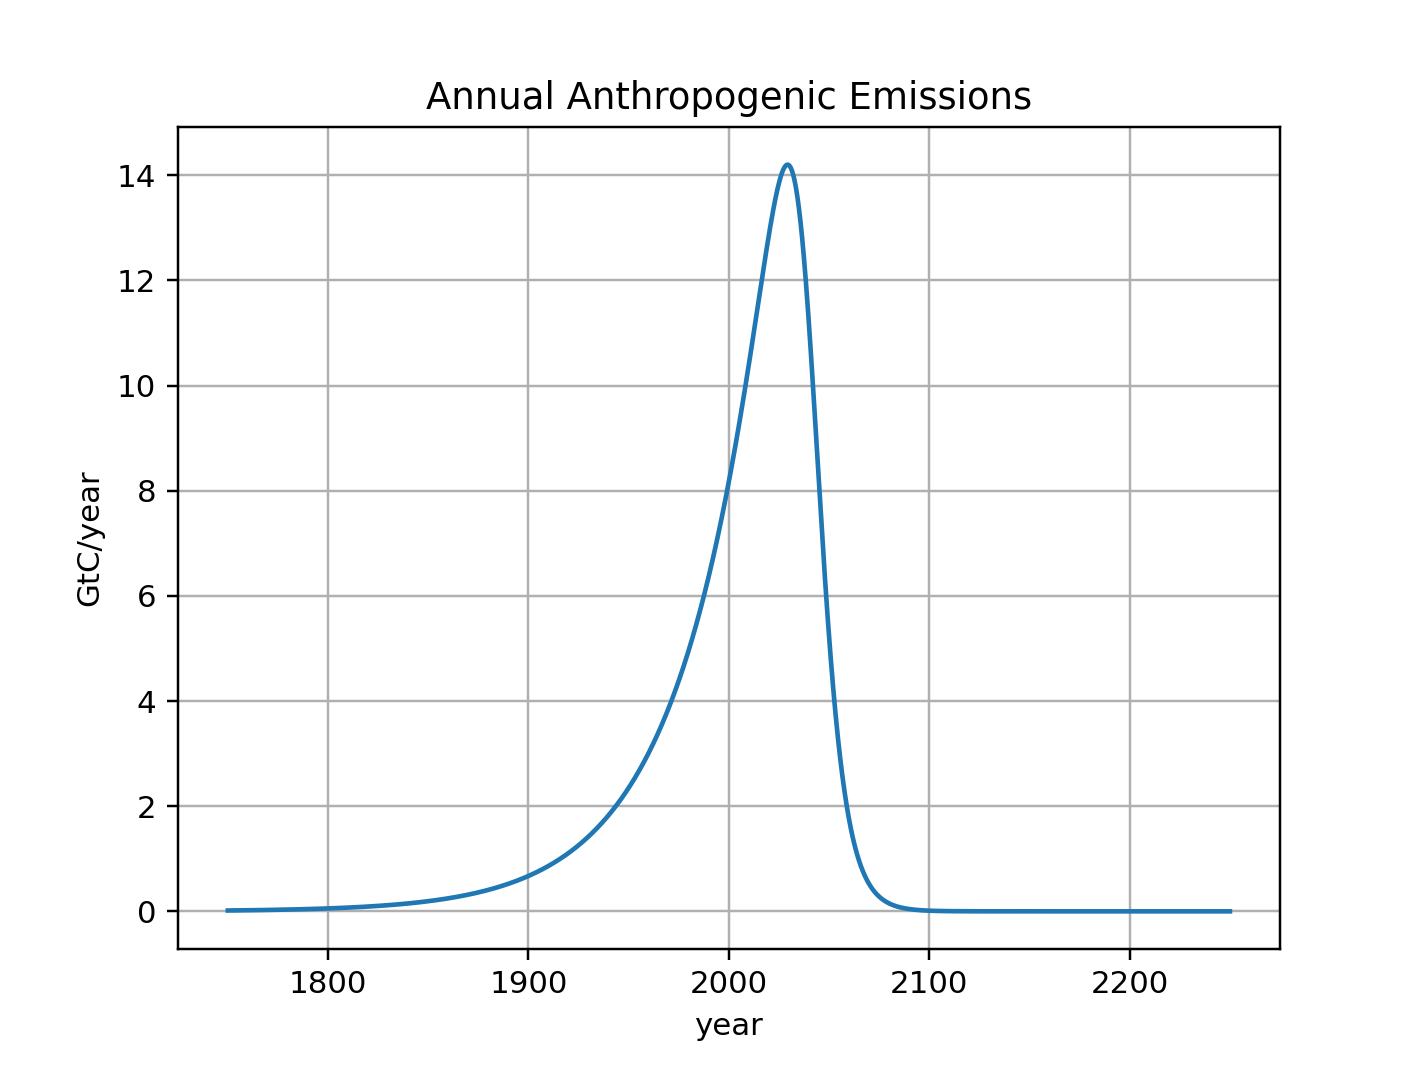

Text(0, 0.5, 'GtC/year')

In [8]:
### BEGIN SOLUTION
plt.figure()
plt.plot(t,eps)
plt.grid(True)
plt.title('Annual Anthropogenic Emissions')
plt.xlabel('year')
plt.ylabel('GtC/year')
### END SOLUTION

### Calculating the _accumulated_ carbon emission of an emission scenario
Eq. (1) says, if you integrate all the emissions up to a certain time, you'll get another function of time that is the accumulated carbon emitted up to that point. Turns out, Numpy has a built-in function, _cumsum_, that does _almost_ that.

<IPython.core.display.Javascript object>


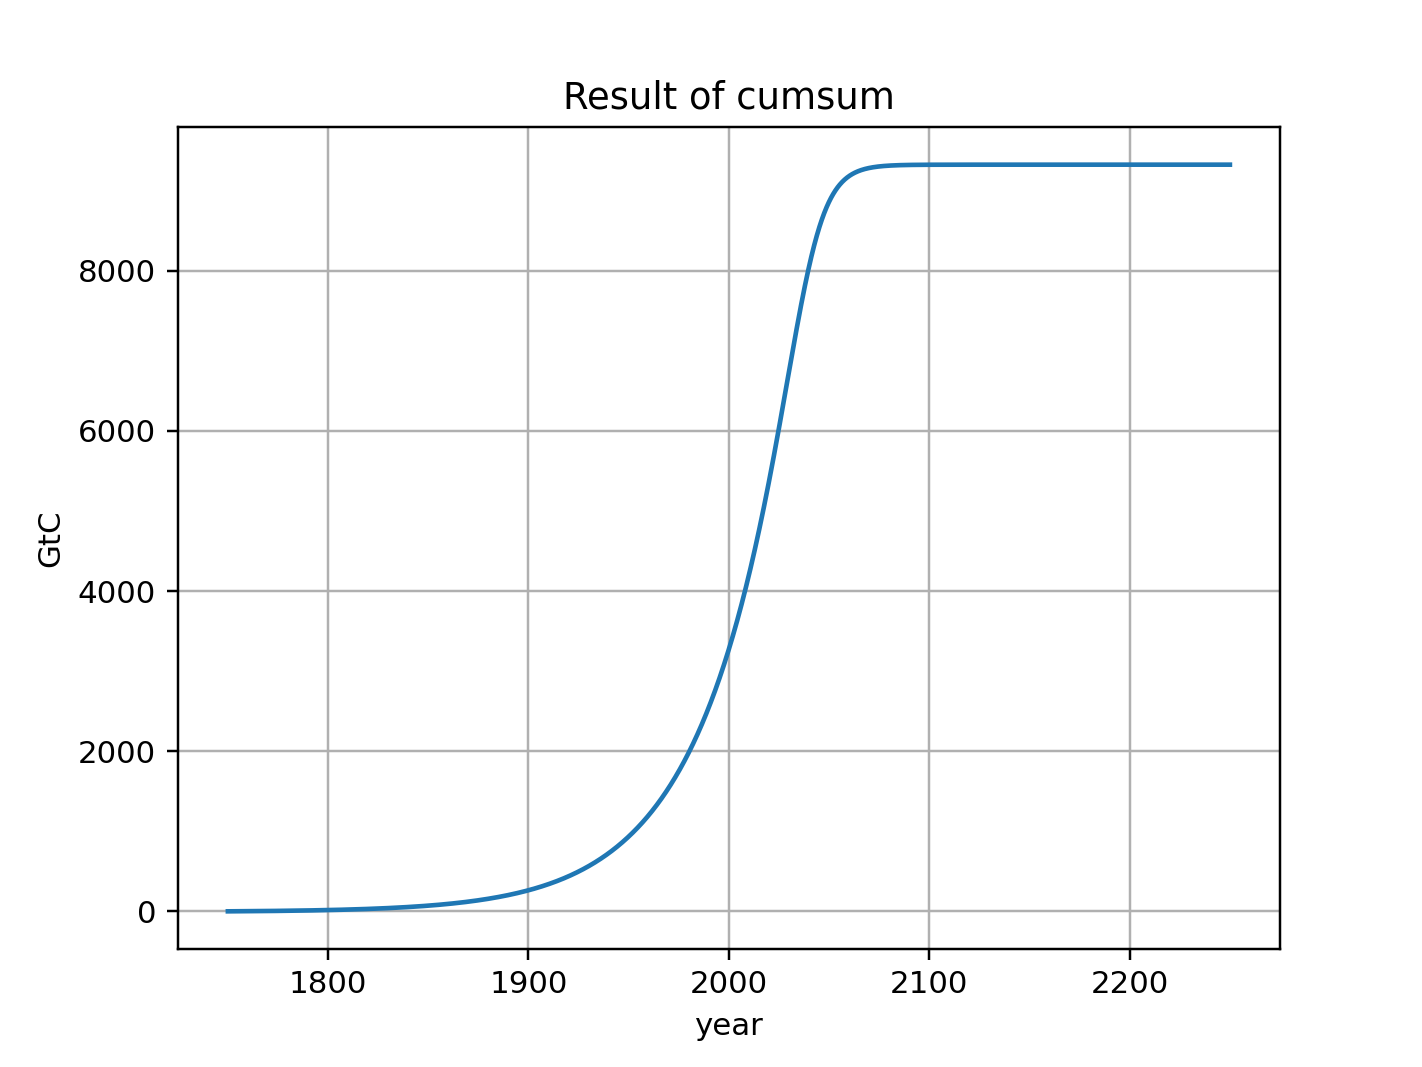

Text(0.5, 1.0, 'Result of cumsum')

In [9]:
# Find accumulated emissions
E = np.cumsum(eps)

# Graph it
plt.figure()
plt.plot(t,E)
plt.grid()
plt.xlabel('year')
plt.ylabel('GtC')
plt.title('Result of cumsum')

### Your turn 
What's missing in the above is that cumsum doesn't take into account how long each time step is. How do you find that out? The easy way is to say dt = t[1]-t[0], where t[0] is the time at the beginning of the series, and t[1] is the time after the first time step. 

In the cell below, duplicate the integration by cumsum we did in the previous cell, but multiply the result by $dt$. Then graph your result.

Time step = 0.10002000400072575


<IPython.core.display.Javascript object>


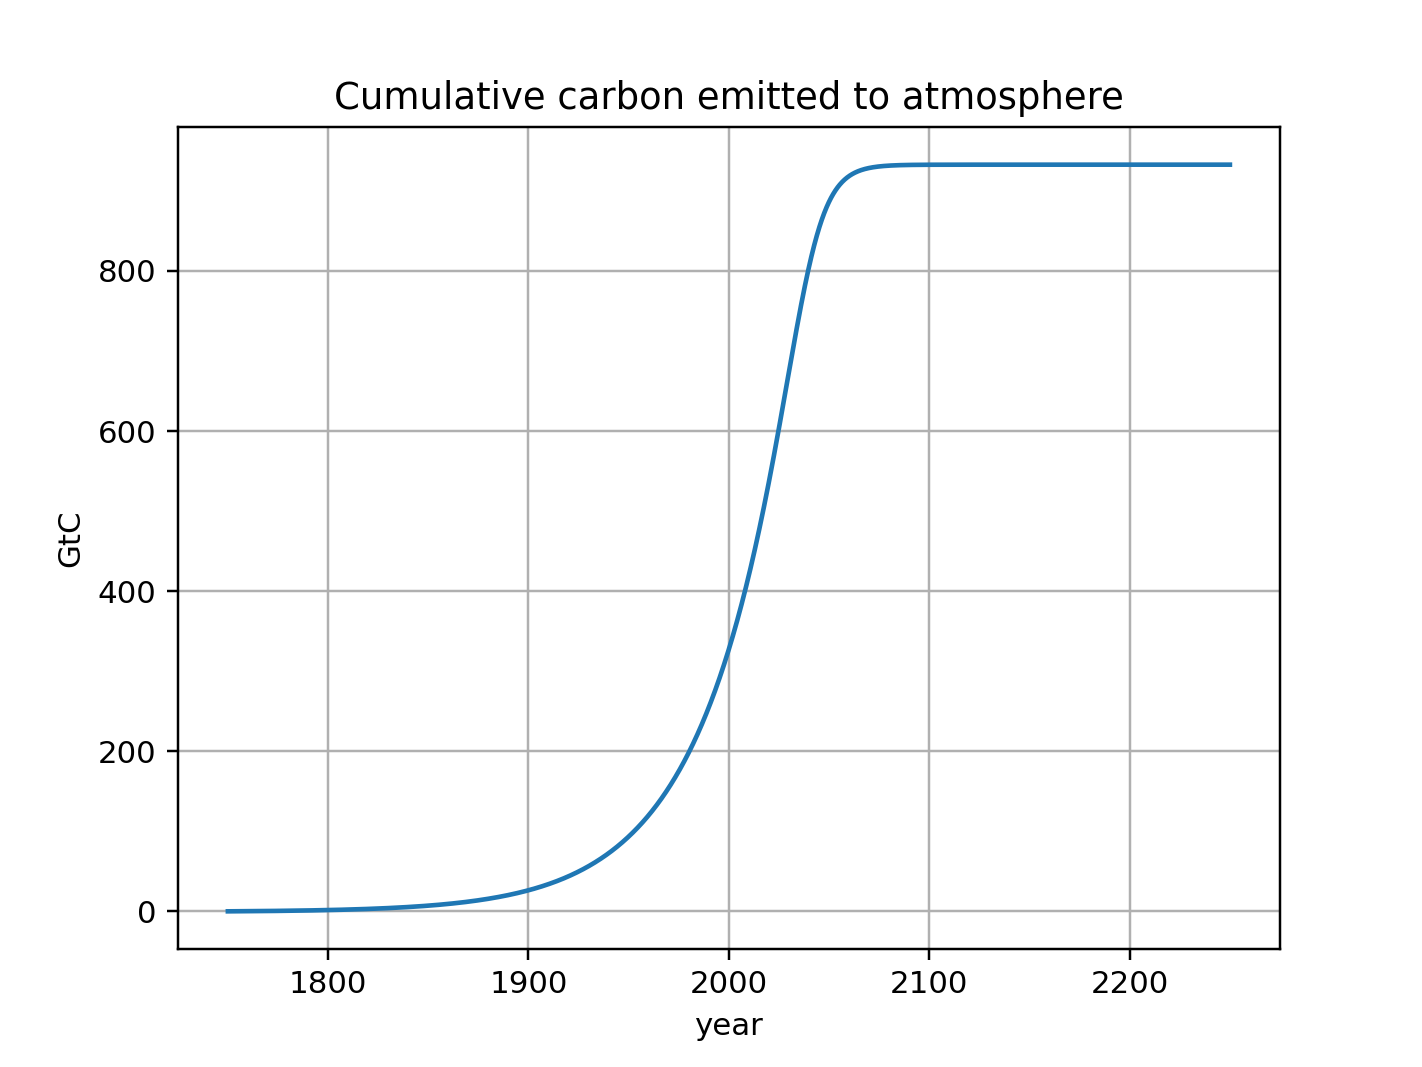

Text(0.5, 1.0, 'Cumulative carbon emitted to atmosphere')

In [10]:
# Get the time interval from the array t
### BEGIN SOLUTION
dt = t[1]-t[0]
print('Time step =', dt)
### END SOLUTION

# Find the accumulation by numerical integration of emissions
### BEGIN SOLUTION
E = np.cumsum(eps)*dt
### END SOLUTION

# Graph the cumulative emissions as a function of time
### BEGIN SOLUTION
plt.figure()
plt.plot(t,E)
plt.grid()
plt.xlabel('year')
plt.ylabel('GtC')
plt.title('Cumulative carbon emitted to atmosphere')
### END SOLUTION

### Pause for analysis
It is thought that known reserves of fossil carbon (mostly in the form of coal) tally up to around 4000 GtC (see https://www.nature.com/articles/nature14016). Hopefully, your cumulative total is less than that amount (otherwise, we have an unrealistic scenario!). In the cell below, calculate the percentage of known reserves of fossil carbon does your schedule *leaves in the ground*.

Some hints on how to do this: 
- The last value of the array $E$ you just calculated can be accessed by E[-1].
- The fraction of known reserves used by that time must be that number divided by 4000.
- The fraction of known reserves remaining by that time must be 1 minus that number; multiplying that by 100 will give us what we're looking for, namely, the percent of known reserves remaining in the ground by the time humans stop mining fossil fuels and burning them.

In [11]:
### BEGIN SOLUTION
remaining = (1-E[-1]/4000)*100
print(remaining)
### END SOLUTION

76.67896413447815


### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page